In [1]:
# Manipulation libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML libraries

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [4]:
# Save the model
import pickle

# Importing Data

Importing data from HTML rendered websites

In [5]:
df = pd.read_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\ 2020-12-06 23h54 dataset_pre_tolken.csv')

In [6]:
df.head()

,candidateMatch,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href_qt,len_href_group_between 80 and 125,len_href_group_over 125,len_href_group_under 80,key_job_yn,num_keys_qt,...,all_text,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0.0,0.022523,0,1,0.000000,0,0,1,0,0.000000,...,href,0,0,0,0,0,0,0,1,0
1,0.0,0.312312,0,1,0.087087,0,0,1,0,0.087087,...,Create account https www later com class href ...,0,0,0,0,0,0,0,1,0
2,0.0,0.125626,0,1,0.077578,0,0,1,0,0.077578,...,Sign In https app later com class href cP nav ...,0,0,0,0,0,0,0,1,0
3,0.0,0.236236,0,1,0.020521,0,0,1,0,0.020521,...,Scheduling schedule href,0,0,0,0,1,0,0,0,0
4,0.0,0.374374,0,1,0.067568,0,0,1,0,0.067568,...,Instagram Analytics instagram analytics href,1,0,0,0,0,0,0,0,0


In [7]:
df.drop('all_text',axis='columns',inplace=True)

In [8]:
df.head()

,candidateMatch,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href_qt,len_href_group_between 80 and 125,len_href_group_over 125,len_href_group_under 80,key_job_yn,num_keys_qt,attr_job_yn,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0.0,0.022523,0,1,0.000000,0,0,1,0,0.000000,0,0,0,0,0,0,0,0,1,0
1,0.0,0.312312,0,1,0.087087,0,0,1,0,0.087087,0,0,0,0,0,0,0,0,1,0
2,0.0,0.125626,0,1,0.077578,0,0,1,0,0.077578,0,0,0,0,0,0,0,0,1,0
3,0.0,0.236236,0,1,0.020521,0,0,1,0,0.020521,0,0,0,0,0,1,0,0,0,0
4,0.0,0.374374,0,1,0.067568,0,0,1,0,0.067568,0,1,0,0,0,0,0,0,0,0


We are going to split the dataset so we can train the models and build a stack later

In [9]:
df_train, df_test = train_test_split(
    df,
    train_size=0.7,
    stratify=df["candidateMatch"]
)

y = df_train["candidateMatch"]  # variável resposta
X = df_train.drop("candidateMatch", axis=1)

y_test = df_test["candidateMatch"]  # variável resposta
X_test = df_test.drop("candidateMatch", axis=1)

# Modeling

<h3>Base line: Dummy</h3>

In [10]:
dummy = DummyClassifier(strategy="stratified")

dummy.fit(X, y)

dummy.score(X_test, y_test)

0.5018896447467877

<h3>Logistic regression</h3>

In [11]:
lr = LogisticRegression()

In [12]:
lr_parameters = {
    'max_iter' : [50, 100, 1000],
    "C" : [0.01 , 0.1, 1.0, 5.0, 8.0]
}

In [13]:
lr_grid = GridSearchCV(lr, lr_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [14]:
lr_grid.fit(X,y)

c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 5.0, 8.0],
                         'max_iter': [50, 100, 1000]},
             scoring='accuracy')

In [15]:
pd.DataFrame(lr_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.935342,0.010113,"{'C': 0.01, 'max_iter': 50}"
1,0.935342,0.010113,"{'C': 0.01, 'max_iter': 100}"
2,0.935342,0.010113,"{'C': 0.01, 'max_iter': 1000}"
3,0.954302,0.006273,"{'C': 0.1, 'max_iter': 50}"
4,0.954302,0.006273,"{'C': 0.1, 'max_iter': 100}"
5,0.954302,0.006273,"{'C': 0.1, 'max_iter': 1000}"
6,0.958029,0.006623,"{'C': 1.0, 'max_iter': 50}"
7,0.958029,0.006623,"{'C': 1.0, 'max_iter': 100}"
8,0.958029,0.006623,"{'C': 1.0, 'max_iter': 1000}"
9,0.958840,0.005285,"{'C': 5.0, 'max_iter': 50}"


In [16]:
lr_best_estimator = lr_grid.best_estimator_
lr_best_score = lr_grid.best_score_
print('best estimator: ', lr_best_estimator)
print('best score: ', lr_best_score)

best estimator:  LogisticRegression(C=8.0, max_iter=50)
best score:  0.9593258432859699


<h3>Random Forest Classifier</h3>

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc_parameters = {
    'n_estimators': [50,100,150,300],
    'max_depth' : [2,5,8]
}

In [19]:
rfc_grid = GridSearchCV(rfc, rfc_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [20]:
rfc_grid.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8],
                         'n_estimators': [50, 100, 150, 300]},
             scoring='accuracy')

In [21]:
pd.DataFrame(rfc_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.916060,0.011518,"{'max_depth': 2, 'n_estimators': 50}"
1,0.917194,0.011118,"{'max_depth': 2, 'n_estimators': 100}"
2,0.916221,0.007844,"{'max_depth': 2, 'n_estimators': 150}"
3,0.916869,0.006489,"{'max_depth': 2, 'n_estimators': 300}"
4,0.942310,0.008051,"{'max_depth': 5, 'n_estimators': 50}"
5,0.943121,0.007226,"{'max_depth': 5, 'n_estimators': 100}"
6,0.941987,0.008162,"{'max_depth': 5, 'n_estimators': 150}"
7,0.943769,0.009942,"{'max_depth': 5, 'n_estimators': 300}"
8,0.968077,0.007174,"{'max_depth': 8, 'n_estimators': 50}"
9,0.969698,0.007061,"{'max_depth': 8, 'n_estimators': 100}"


In [22]:
rfc_best_estimator = rfc_grid.best_estimator_
rfc_best_score = rfc_grid.best_score_
print('best estimator: ', rfc_best_estimator)
print('best score: ', rfc_best_score)

best estimator:  RandomForestClassifier(max_depth=8, n_estimators=300)
best score:  0.9700222393563177


<h3>SCV</h3>

First, let's take a look at how the job links are distributed when we cross two of the most important features.
It looks promissing. Probably the model will be able to create hyperplans that properly classifies the links once we add other features.

c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


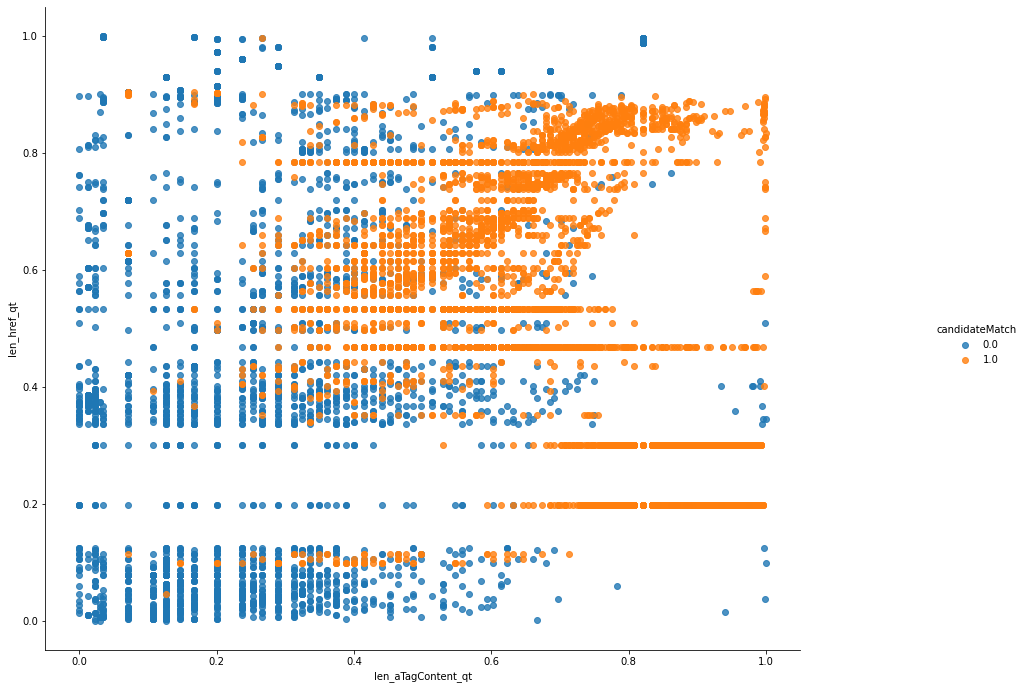

In [23]:
sns.lmplot('len_aTagContent_qt', 'len_href_qt', df, hue='candidateMatch', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [24]:
svc = SVC()

In [25]:
svc_parameters = [
    {'C': [0.01, 0.1, 1], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}#,
]

In [26]:
svc_grid = GridSearchCV(svc, svc_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [27]:
svc_grid.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [28]:
pd.DataFrame(svc_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.953654,0.006848,"{'C': 0.01, 'kernel': 'linear'}"
1,0.957219,0.006077,"{'C': 0.1, 'kernel': 'linear'}"
2,0.959812,0.005559,"{'C': 1, 'kernel': 'linear'}"
3,0.546265,0.000220,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}"
4,0.546265,0.000220,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}"
5,0.546265,0.000220,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}"
6,0.931292,0.011510,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.950413,0.006414,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}"
8,0.954790,0.007506,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}"
9,0.864528,0.011179,"{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}"


In [29]:
svc_best_estimator = svc_grid.best_estimator_
svc_best_score = svc_grid.best_score_
print('best estimator: ', svc_best_estimator)
print('best score: ', svc_best_score)

best estimator:  SVC(C=100, gamma=100)
best score:  0.9755293648670621


We got a really good result again.

<h3>KNN</h3>

In [30]:
knn=KNeighborsClassifier()
knn_parameters = [
                  {'n_neighbors' : [5,11, 31, 81, 99], 'algorithm': ['auto', 'ball_tree','kd_tree', 'brute'],
                   'p':[1,2]} 
]

In [31]:
knn_grid = GridSearchCV(knn, knn_parameters, cv=10, scoring='accuracy', return_train_score=False)

In [32]:
knn_grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [5, 11, 31, 81, 99], 'p': [1, 2]}],
             scoring='accuracy')

In [33]:
pd.DataFrame(knn_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.971964,0.007608,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}"
1,0.970181,0.006415,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}"
2,0.970670,0.004717,"{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1}"
3,0.968563,0.004649,"{'algorithm': 'auto', 'n_neighbors': 11, 'p': 2}"
4,0.959976,0.007378,"{'algorithm': 'auto', 'n_neighbors': 31, 'p': 1}"
5,0.959814,0.007338,"{'algorithm': 'auto', 'n_neighbors': 31, 'p': 2}"
6,0.956734,0.007490,"{'algorithm': 'auto', 'n_neighbors': 81, 'p': 1}"
7,0.956572,0.007924,"{'algorithm': 'auto', 'n_neighbors': 81, 'p': 2}"
8,0.957058,0.007463,"{'algorithm': 'auto', 'n_neighbors': 99, 'p': 1}"
9,0.957220,0.007972,"{'algorithm': 'auto', 'n_neighbors': 99, 'p': 2}"


In [34]:
knn_best_estimator = knn_grid.best_estimator_
knn_best_score = knn_grid.best_score_
print('best estimator: ', knn_best_estimator)
print('best score: ', knn_best_score)

best estimator:  KNeighborsClassifier(p=1)
best score:  0.971963986929133


# Stacking

SVC was not trained with probability=True because its proba is not accurate. The work around it is to apply a calibration function to the best estimator we got.

In [35]:
from sklearn.calibration import CalibratedClassifierCV

In [36]:
calibration_svc = CalibratedClassifierCV(svc_grid.best_estimator_)
calibration_svc.fit(X,y)

CalibratedClassifierCV(base_estimator=SVC(C=100, gamma=100))

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

We will create a function so we can plot the results later.<br>
Here we will use the inbuilt sklearn StackingClassifier. It will take the best estimators found through gridsearch and apply a Logistic Regression on the proba of the estimators.

In [38]:
def get_stacking():
    estimators = [
        ("model0", lr_grid.best_estimator_),
        ("model1", knn_grid.best_estimator_),
        ("model2", rfc_grid.best_estimator_),
        ("model3", calibration_svc),
    ]

    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        stack_method="predict_proba"
    )

    return clf

After building all of our models, we will evaluate them using X_test.

In [39]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

Building a dict of models so we can loop through them and also get their names

In [40]:
def get_models():
    models = dict()
    models['LogisticRegression'] = lr_best_estimator
    models['RandomForestClassifier'] = rfc_best_estimator
    models['kNN'] = knn_best_estimator
    models['SVC_calibrated'] = calibration_svc
    models['Stack'] = get_stacking()
    return models


Evaluating the models and ploting a bloxpot to better visualized the results.

>LogisticRegression 0.954 (0.014)
>RandomForestClassifier 0.968 (0.012)
>kNN 0.965 (0.010)
>SVC_calibrated 0.969 (0.009)
>Stack 0.972 (0.010)


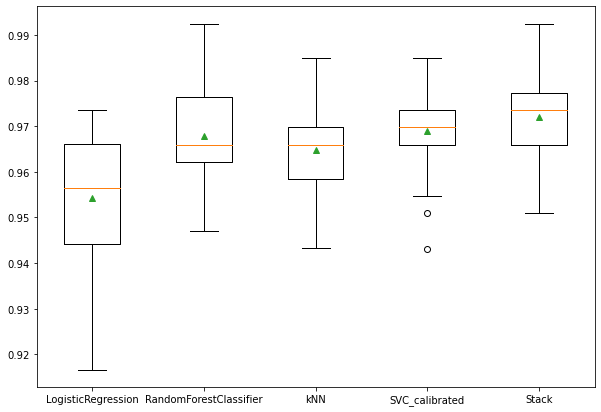

In [41]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_test, y_test)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [42]:
clf = models['Stack']

In [43]:
clf

StackingClassifier(cv=5,
                   estimators=[('model0',
                                LogisticRegression(C=8.0, max_iter=50)),
                               ('model1', KNeighborsClassifier(p=1)),
                               ('model2',
                                RandomForestClassifier(max_depth=8,
                                                       n_estimators=300)),
                               ('model3',
                                CalibratedClassifierCV(base_estimator=SVC(C=100,
                                                                          gamma=100)))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [44]:
clf.fit(X,y)

c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ponde\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

StackingClassifier(cv=5,
                   estimators=[('model0',
                                LogisticRegression(C=8.0, max_iter=50)),
                               ('model1', KNeighborsClassifier(p=1)),
                               ('model2',
                                RandomForestClassifier(max_depth=8,
                                                       n_estimators=300)),
                               ('model3',
                                CalibratedClassifierCV(base_estimator=SVC(C=100,
                                                                          gamma=100)))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [45]:
filename = r'C:\Users\ponde\Documents\FreshJobs\link_classifier_cluster.sav'
pickle.dump(clf, open(filename, 'wb'))

The RandomForestClassifier performed a little bit better, so let's evaluate its genaralization capacity vs the stack.

# Deep diving the results

In [46]:
dfFull = pd.read_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\dataset_before_col_drop2020-12-06 23h53.csv')

In [47]:
#pred_stack = models['Stack'].predict(df.drop('candidateMatch',axis=1))
pred_stack = clf.predict(df.drop('candidateMatch',axis=1))
pred_rfc = rfc_grid.best_estimator_.predict(df.drop('candidateMatch',axis=1))

In [48]:
dfFull['pred_stack'] = pred_stack
dfFull['pred_rfc'] = pred_rfc
dfFull['correct_stack'] = np.where(dfFull['pred_stack']==dfFull['candidateMatch'],1,0)
dfFull['correct_rfc'] = np.where(dfFull['pred_rfc']==dfFull['candidateMatch'],1,0)

In [49]:
matches = dfFull[['company','correct_stack','correct_rfc']].groupby('company').agg(['mean','count'])

In [50]:
matches

correct_stack        \
                                                           mean count   
company                                                                 
3M Canada Company                                      1.000000     1   
ABB Inc.                                               0.913793   232   
Aboriginal Peoples Television Network Inc. / APTN      1.000000    50   
Agriculture Financial Services Corporation / AFSC      1.000000    98   
Alberta Health Services / AHS                          0.829268    41   
...                                                         ...   ...   
shopify                                                0.979592    98   
square                                                 1.000000   301   
walmart                                                1.000000    18   
wattpad                                                0.844444    45   
yelp                                                   1.000000    50   

                                                  correct_rfc        
                                                         mean count  
company                                                              
3M Canada Company                                    1.000000     1  
ABB Inc.                                             0.905172   232  
Aboriginal Peoples Television Network Inc. / APTN    1.000000    50  
Agriculture Financial Services Corporation / AFSC    0.989796    98  
Alberta Health Services / AHS                        0.780488    41  
...                                                       ...   ...  
shopify                                              0.979592    98  
square                                               1.000000   301  
walmart                                              1.000000    18  
wattpad                                              0.822222    45  
yelp                                                 0.960000    50  

[68 rows x 4 columns]

In [51]:
rfc_means =  dfFull[['company','correct_rfc']].groupby('company').agg('mean')
stack_means = dfFull[['company','correct_stack']].groupby('company').agg('mean')

In [52]:
rfc_mean = np.mean(rfc_means['correct_rfc'])
rfc_std = np.std(rfc_means['correct_rfc'])

stack_mean = np.mean(stack_means['correct_stack'])
stack_std = np.std(stack_means['correct_stack'])


print('rfc: %.3f (%.3f)' % (rfc_mean, rfc_std))
print('stack: %.3f (%.3f)' % (stack_mean, stack_std))

rfc: 0.945 (0.122)
stack: 0.971 (0.069)


Average company accuracy:
rfc: 0.945 (0.122)
stack: 0.971 (0.069)


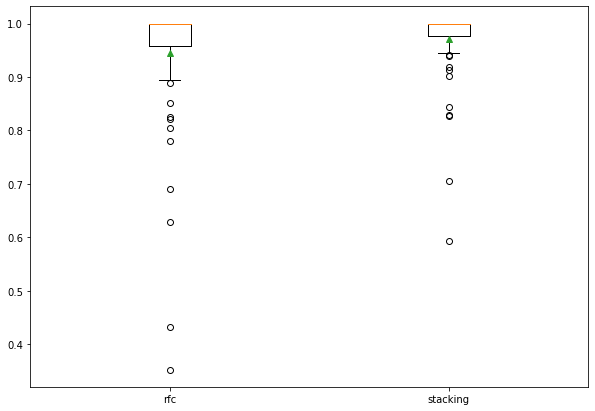

In [53]:
comp = list()
comp.append(rfc_means['correct_rfc'].values)
comp.append(stack_means['correct_stack'].values)

print('Average company accuracy:')
print('rfc: %.3f (%.3f)' % (rfc_mean, rfc_std))
print('stack: %.3f (%.3f)' % (stack_mean, stack_std))

plt.figure(figsize=(10,7))
plt.boxplot(comp, labels=['rfc','stacking'], showmeans=True)
plt.show()